In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from libVersion1 import *
# 1805数据集的数据点生成方式存疑，其坐标位置并非设定的坐标点，怀疑是输出的区域内网格中心点坐标
# 本方法使用griddata将数据点向网格重聚类形成数据矩阵
import scipy.io as scio
import scipy
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [ ]:
# x_grid， y_grid: 从数据中抽取的点x, y坐标
# x_coords = np.arange(0, 0.095, 0.001)
# y_coords = np.arange(0, 0.042, 0.001)
# target_x, target_y = np.meshgrid(
#     x_coords,
#     y_coords,
# )
# # 生成坐标点对
# points = np.column_stack((x_grid, y_grid))
# vxgrid = griddata(points, vx * 10, (target_x, target_y), method='nearest')
# vygrid = griddata(points, vy * 10, (target_x, target_y), method='nearest')

# 可视化涡度矩阵
# vortFromSpeed = compute_vorticity(vxgrid, vygrid)
# plt.imshow(vortFromSpeed+40, cmap='jet')
# plt.colorbar()
# plt.title('Vorticity')
# plt.show()
# # 对值进行插值
# plt.figure(figsize=(8, 3)) 
# zi = griddata((x_grid, y_grid), vort, (target_x, target_y), method='nearest')

# # 创建云图
# plt.contourf(target_x, target_y, zi, levels=20, cmap='jet')

# # 添加颜色条
# plt.colorbar()

# # 添加标题和坐标轴标签
# plt.title('Contour Plot')
# plt.xlabel('X')
# plt.ylabel('Y')

# # 显示图形
# plt.show()


In [2]:
df0001 = read_data('dataset/0115FFF26/FFF-26-202401151805-0001')
df0002 = read_data('dataset/0115FFF26/FFF-26-202401151805-0002')
_, _, vx1, vy1, vort1 = collect_data(df0001)
_, _, vx2, vy2, vort2 = collect_data(df0002)
vx1.shape, vy1.shape
matrixVx = np.column_stack((vx1, vx2))
matrixVx.shape
vx1

1      -3.140393e-07
2      -3.140393e-07
3      -3.227288e-07
4      -3.227288e-07
5      -3.158367e-07
            ...     
7756   -1.547692e-07
7757   -1.468832e-07
7758   -1.547692e-07
7759   -1.622461e-07
7760   -1.622461e-07
Length: 7760, dtype: float64

In [3]:
# 方法整合
x_grid, y_grid, Vx, Vy, VortAll = DataStorage('dataset/0115FFF26')
Vx.shape, Vy.shape, VortAll.shape

600


((7760, 600), (7760, 600), (7760, 600))

In [4]:
# 数据在网格中插值形成矩阵
from scipy.interpolate import griddata
Vort = data2matrix(x_grid, y_grid, VortAll)
U = data2matrix(x_grid, y_grid, Vx)
V = data2matrix(x_grid, y_grid, Vy)
Vort.shape, U.shape, V.shape

((42, 95, 600), (42, 95, 600), (42, 95, 600))

In [5]:

computedVort = computeMatrixSpeed2Vort(U, V)
computedVort.shape

(42, 95, 600)

In [6]:
# 计算UV向量
U_xt = Uxyt2Uxt(U)  # 把二维问题转化为一维问题
V_xt = Uxyt2Uxt(V)
U_xt.shape, V_xt.shape

((3990, 600), (3990, 600))

In [7]:
# 合并UV向量
UV_xt = np.vstack((U_xt, V_xt))
U0x, An, PhiU, Ds = pod_svd(UV_xt.T)

size U: 600 600
size S: 600
size PhiU: 600 7980
[[1.78260335e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.82016982e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.54751261e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.36411571e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.91038044e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.40720308e-13]]
size An: 600 600


UVx: [ 0.0079413   0.01099264 -0.0081505  ...  0.07354299  0.07354299
  0.06600631]
Ny*Nx: 3990
UVx: 7980
Ux: 3990
Vx: 3990
[-0.00408989  0.00430617  0.00751335 ...  0.07354299  0.07354299
  0.06600631]
UVx: [ 0.00061669  0.00197495  0.00334231 ... -0.00226265 -0.00226265
 -0.00254565]
Ny*Nx: 3990
UVx: 7980
Ux: 3990
Vx: 3990
[-0.00033448 -0.0002999  -0.00028695 ... -0.00226265 -0.00226265
 -0.00254565]
UVx: [ 6.33974985e-05  5.50067042e-04  1.59181951e-03 ... -2.84797042e-03
 -2.84797042e-03 -2.49944593e-03]
Ny*Nx: 3990
UVx: 7980
Ux: 3990
Vx: 3990
[-2.68378053e-05 -2.23052090e-04 -2.91565667e-04 ... -2.84797042e-03
 -2.84797042e-03 -2.49944593e-03]
UVx: [0.00209595 0.00654957 0.01069441 ... 0.00475612 0.00475612 0.00542139]
Ny*Nx: 3990
UVx: 7980
Ux: 3990
Vx: 3990
[-0.00114796 -0.00096906 -0.00084443 ...  0.00475612  0.00475612
  0.00542139]


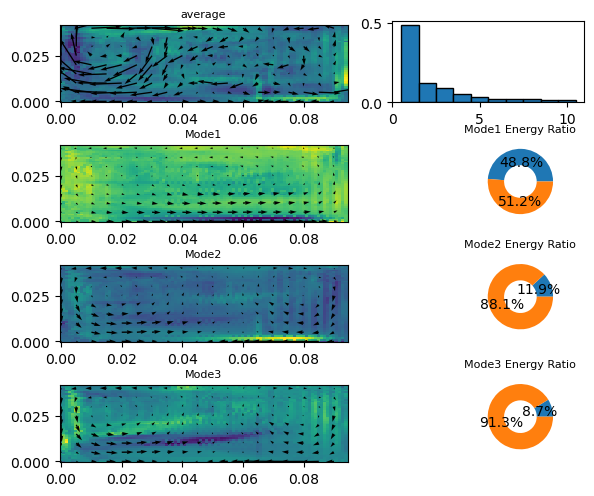

0

In [8]:

x_coords = np.arange(0, 0.095, 0.001)
y_coords = np.arange(0, 0.042, 0.001)
displayPOD2D_Vector(U0x, PhiU, Ds, x_coords, y_coords)

In [9]:
# DMD实践

# VortAll = Uxyt2Uxt(Vort)
VortAll = Uxyt2Uxt(computedVort)
VortAll.shape

(3990, 600)

In [10]:
X = VortAll.T
Y = np.vstack((X, X))
Y.shape

UX = Y[:, 0:Y.shape[1]-1]
UY = Y[:, 1:Y.shape[1]]

UX2 = VortAll[:, 0:VortAll.shape[1]-1]
UY2 = VortAll[:, 1:VortAll.shape[1]]
UX2.shape, UY2.shape

((3990, 599), (3990, 599))

In [11]:
# 计算DMD
import scipy
Dd, b, Phi, Time_DMD, Energy = DMD_class(UX2, UY2) 

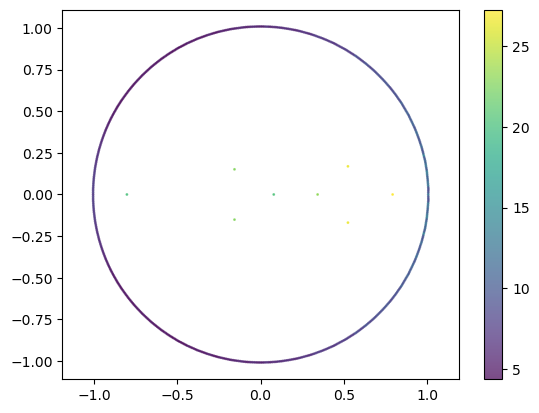

In [12]:
# 图1 输出特征根分布
plt.scatter(np.sum(np.real(Dd[::-1]), axis=1),
            np.sum(np.imag(Dd[::-1]), axis=1),
            s=1,
            c=-np.log(Energy[::-1]),
            cmap='viridis',
            alpha=0.7)
plt.colorbar()
plt.axis('equal')
plt.show()

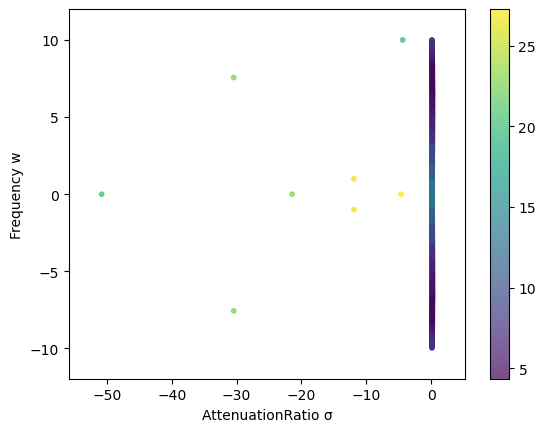

In [13]:
fig2 = plt.figure(2)
# 图2 绘制频率和衰减图
Fs = 1 / 0.05
wa = np.log(np.sum(Dd, axis=1)) * Fs
# 增加一个极小的数防止计算过程出现inf
plt.scatter(np.real(wa),
            np.imag(wa) / (2 * np.pi),
            s=10,
            c=-np.log(Energy),
            cmap='viridis',
            alpha=0.7)
plt.xlabel('AttenuationRatio σ')
plt.ylabel('Frequency w')
plt.colorbar()
rangex = np.nanmax(np.real(wa)) - np.nanmin(np.real(wa))
rangey = np.nanmax(np.imag(wa) / (2 * np.pi)) - np.nanmin(np.imag(wa)) / (2 * np.pi)
plt.xlim(np.nanmin(np.real(wa)) - 0.1 * rangex, np.nanmax(np.real(wa)) + 0.1 * rangex)
plt.ylim(np.nanmin(np.imag(wa)) / (2 * np.pi) - 0.1 * rangey, np.nanmax(np.imag(wa) / (2 * np.pi)) + 0.1 * rangey) 
plt.show()

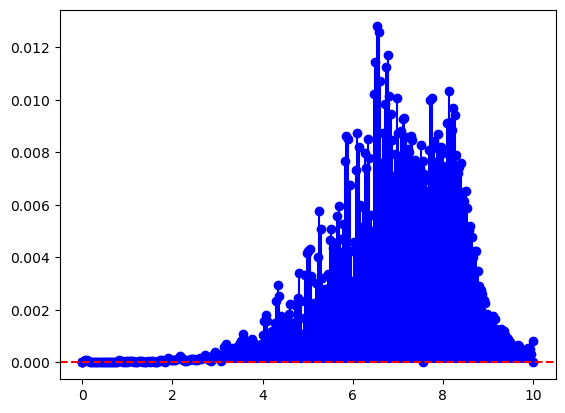

In [14]:
fig3 = plt.figure(3)
# 频率-能量排序
Freq = np.imag(wa) / 2 / np.pi
# 找到大于等于0的频率部分的索引
k = np.where(Freq >= 0)[0]

# 绘制幅度谱
# plt.stem(Freq[k], np.log10(Energy[k]), basefmt='b', linefmt='b-', 
#          markerfmt='bo')
plt.stem(Freq[k], Energy[k], basefmt='b', linefmt='b-', 
         markerfmt='bo')
# 设置基线值为-6
plt.axhline(y=np.min(Energy[k]), color='r', linestyle='--')

# 显示图形
plt.show()

In [15]:
Freq

array([ 6.53997458, -6.53997458,  6.57446652, -6.57446652,  6.77647521,
       -6.77647521,  6.50530663, -6.50530663,  6.74263667, -6.74263667,
        6.60828485, -6.60828485,  8.13163136, -8.13163136, -6.47140366,
        6.47140366,  6.81035391, -6.81035391,  6.98032912, -6.98032912,
        7.75864669, -7.75864669,  7.72498485, -7.72498485,  6.70786119,
       -6.70786119,  8.23342658, -8.23342658,  6.84410605, -6.84410605,
        8.26652999, -8.26652999,  7.14902146, -7.14902146,  7.11477285,
       -7.11477285,  8.1653533 , -8.1653533 ,  8.09869653, -8.09869653,
        8.19981329, -8.19981329,  7.08081513, -7.08081513,  6.67346931,
       -6.67346931,  6.10005759, -6.10005759,  7.01327886, -7.01327886,
        7.89416593, -7.89416593,  5.8623712 , -5.8623712 ,  7.28378036,
       -7.28378036,  7.1832475 , -7.1832475 ,  6.33741034, -6.33741034,
        5.89648921, -5.89648921,  6.87729651, -6.87729651,  7.31768933,
       -7.31768933,  7.79262093, -7.79262093,  7.52118496, -7.52

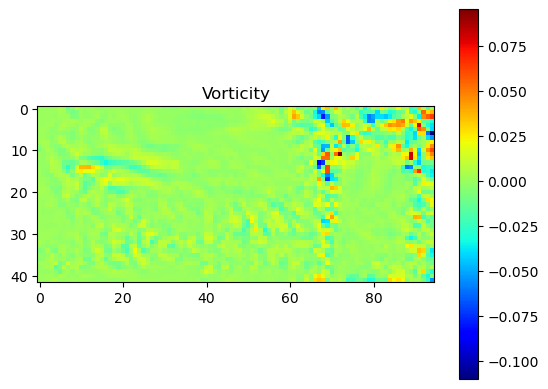

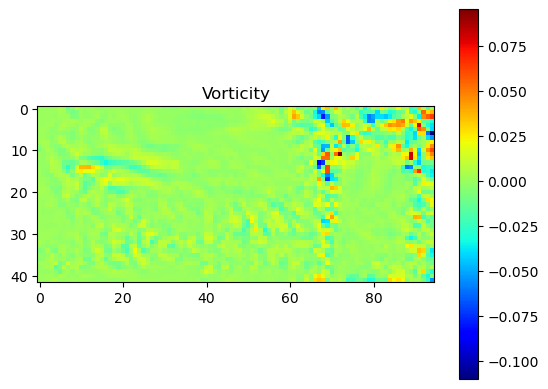

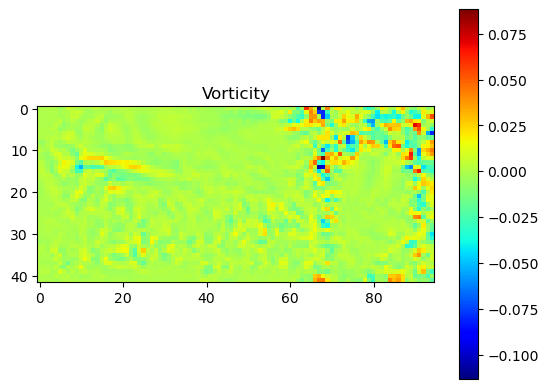

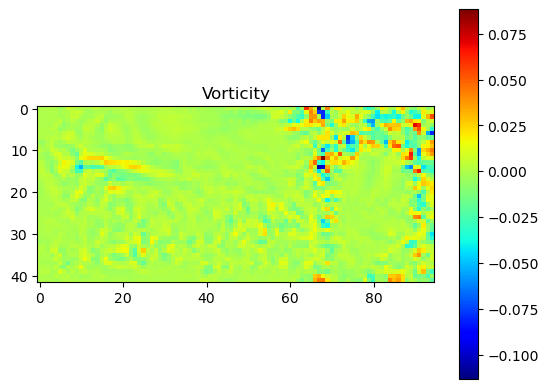

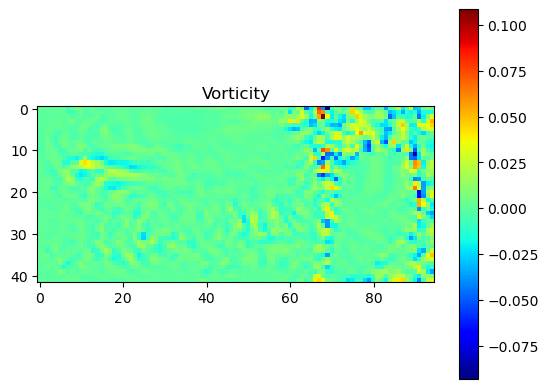

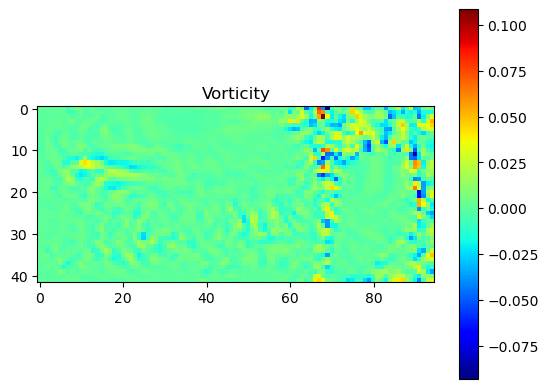

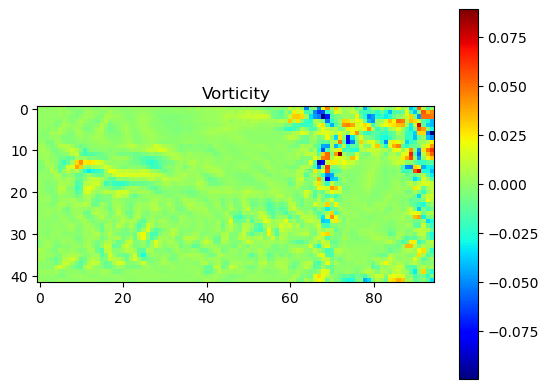

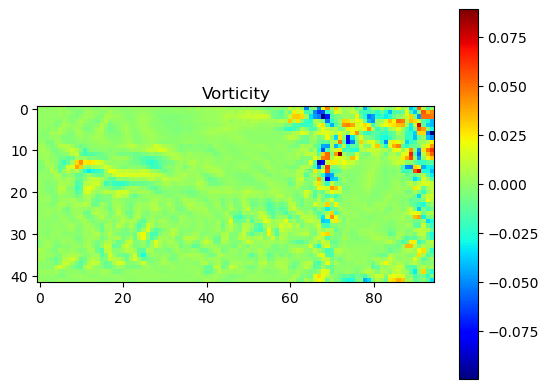

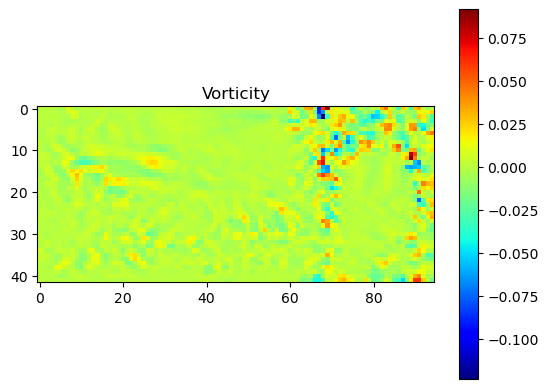

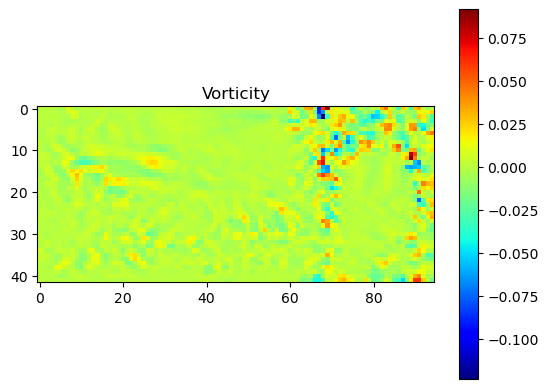

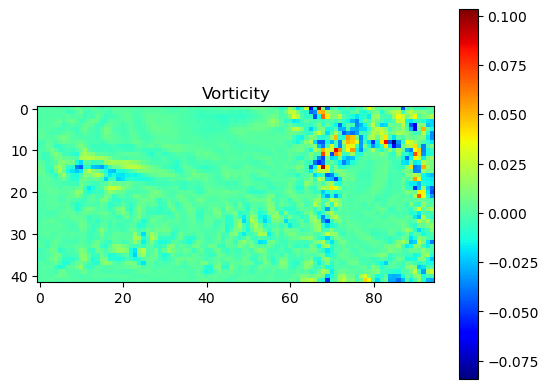

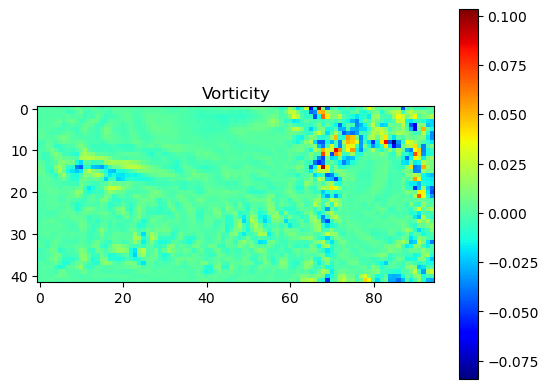

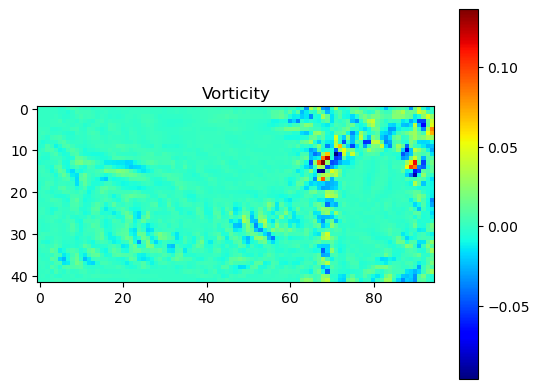

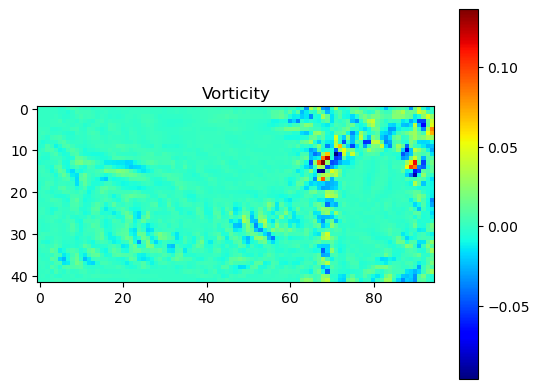

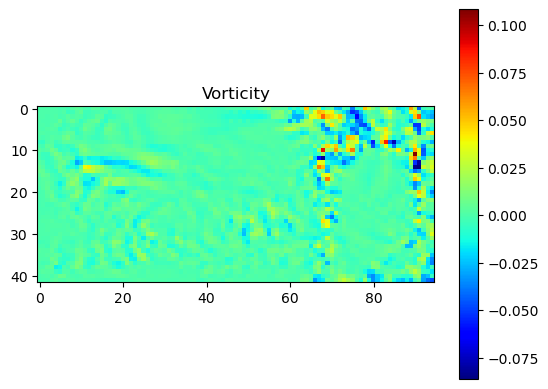

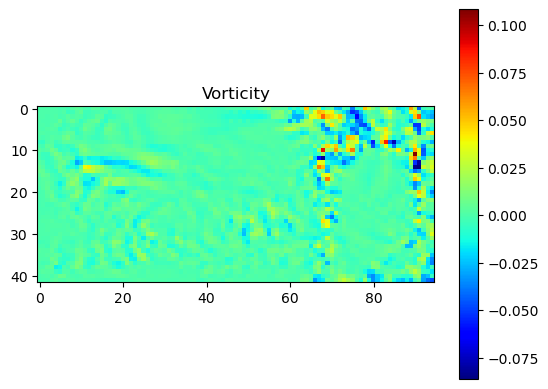

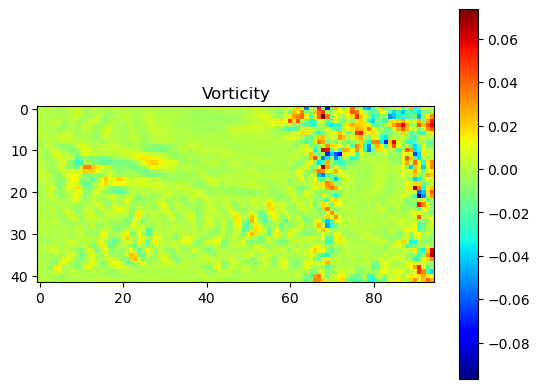

KeyboardInterrupt: 

In [19]:
x_coords = np.arange(0, 0.095, 0.001)
y_coords = np.arange(0, 0.042, 0.001)
target_x, target_y = np.meshgrid(
    x_coords,
    y_coords,
)
ny = target_y.shape[0]
nx = target_x.shape[1]
for i in range(Phi.shape[1]):
    plt.clf()
    plt.imshow(np.reshape(np.real(Phi[:, i]), (ny, nx)), cmap='jet')
    plt.colorbar()
    plt.title('Vorticity')
    plt.show()
    plt.pause(0.5)

In [20]:
%matplotlib qt5
import matplotlib
import scipy.io as scio
import matplotlib.colors as mcolors
import matplotlib.cm as cm
ny = target_y.shape[0]
nx = target_x.shape[1]
cc_path = "../DMD_BOOK/CODE/CH02_FLUIDS/CCcool.mat"
cc = scio.loadmat(cc_path)
cc = cc['CC']
cmap = mcolors.ListedColormap(cc)
is_ipython = 'qt5' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
def plot_durations(vort):
    plt.colormap = cmap
    plt.clf()
    
    plt.pcolor(vort, cmap=cmap)
    cmin = -np.min((np.abs(np.min(vort)), np.max(vort)))#.astype(int)
    cmax = np.min((np.abs(np.min(vort)), np.max(vort)))#.astype(int)
    caxis_range = [cmin, cmax]
    plt.clim(caxis_range[0], caxis_range[1])
    # 重置坐标轴
    # plt.xticks([1, 50, 100, 150, 200, 250, 300, 350, 400, 449], ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8'])
    # plt.yticks([1, 50, 100, 150, 199], ['2', '1', '0', '-1', '-2'])
    # plt.gcf().set_position([500, 500, 900, 390])
    plt.gca().set_zorder(10)
    plt.ylabel('y', fontname='Arial', fontsize=14)
    plt.xlabel('x', fontname='Arial', fontsize=14)
    plt.axis('equal')
    plt.contour(vort, np.linspace(-np.max(vort), -np.max(vort)/20, 60), colors='k', linestyles='solid', linewidths=1)
    plt.contour(vort, np.linspace(np.max(vort)/20, np.max(vort), 60), colors='k', linestyles='--', linewidths=1)
    # theta = np.linspace(0, 2*np.pi, 100)
    # x = 49 + 25 * np.sin(theta)
    # y = 99 + 25 * np.cos(theta)
    # # 绘制填充的圆柱体
    # plt.fill(x, y, [.3, .3, .3])
    # # 绘制圆柱体的边界
    # plt.plot(x, y, 'k', linewidth=1.2)
    plt.pause(0.1)
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())
for i in range(100):
    plot_durations(np.reshape(np.real(Phi[:, i]), (ny, nx)).T)
    # plot_durations(np.reshape(np.imag(Phi[:, i]), (ny, nx)).T)